In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
sports = 'MLB'
season = 'reg'

In [4]:
# data folder path
data_directory = os.path.join('..','data','sports_data/{}/{}'.format(sports,season))
data_directory_saves = os.path.join( '..','data','clean_data','sports_data/{}/'.format(sports))

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.csv")) 
df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 22 columns):
Gm#                1296 non-null int64
Year               1296 non-null int64
Date               1296 non-null object
Unnamed: 3         1296 non-null object
Tm                 1296 non-null object
Unnamed: 5         648 non-null object
Opp                1296 non-null object
W/L                1296 non-null object
R                  1296 non-null int64
RA                 1296 non-null int64
Inn                107 non-null float64
W-L                1296 non-null object
Rank               1296 non-null int64
GB                 1296 non-null object
Win                1296 non-null object
Loss               1296 non-null object
Save               648 non-null object
Time               1296 non-null object
D/N                1296 non-null object
Attendance         1295 non-null float64
Streak             1296 non-null object
Orig. Scheduled    1 non-null object
dtypes: float64(2), in

In [7]:
df.head()

,Gm#,Year,Date,Unnamed: 3,Tm,Unnamed: 5,Opp,W/L,R,RA,...,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
0,1,2010,Monday Apr 5,boxscore,HOU,NaN,SFG,L,2,5,...,3,1,Lincecum,Oswalt,Wilson,2:34,N,43836.0,-,NaN
1,2,2010,Tuesday Apr 6,boxscore,HOU,NaN,SFG,L,0,3,...,6,1.5,Zito,Rodriguez,Wilson,2:38,N,24237.0,--,NaN
2,3,2010,Wednesday Apr 7,boxscore,HOU,NaN,SFG,L,4,10,...,6,2.5,Affeldt,Gervacio,NaN,3:01,D,21599.0,---,NaN
3,4,2010,Friday Apr 9,boxscore,HOU,NaN,PHI,L,0,8,...,6,3,Happ,Norris,NaN,3:17,N,27288.0,----,NaN
4,5,2010,Saturday Apr 10,boxscore,HOU,NaN,PHI,L,6,9,...,6,4,Moyer,Lyon,NaN,3:04,N,35138.0,-----,NaN


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

Gm#                   0
Year                  0
Date                  0
Unnamed: 3            0
Tm                    0
Unnamed: 5          648
Opp                   0
W/L                   0
R                     0
RA                    0
Inn                1189
W-L                   0
Rank                  0
GB                    0
Win                   0
Loss                  0
Save                648
Time                  0
D/N                   0
Attendance            1
Streak                0
Orig. Scheduled    1295
dtype: int64

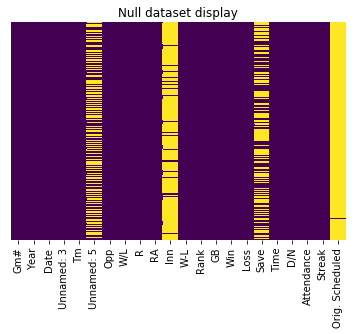

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [10]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [11]:
df.head()

,gm#,year,date,unnamed: 3,tm,unnamed: 5,opp,w/l,r,ra,...,rank,gb,win,loss,save,time,d/n,attendance,streak,orig. scheduled
0,1,2010,Monday Apr 5,boxscore,HOU,NaN,SFG,L,2,5,...,3,1,Lincecum,Oswalt,Wilson,2:34,N,43836.0,-,NaN
1,2,2010,Tuesday Apr 6,boxscore,HOU,NaN,SFG,L,0,3,...,6,1.5,Zito,Rodriguez,Wilson,2:38,N,24237.0,--,NaN
2,3,2010,Wednesday Apr 7,boxscore,HOU,NaN,SFG,L,4,10,...,6,2.5,Affeldt,Gervacio,NaN,3:01,D,21599.0,---,NaN
3,4,2010,Friday Apr 9,boxscore,HOU,NaN,PHI,L,0,8,...,6,3,Happ,Norris,NaN,3:17,N,27288.0,----,NaN
4,5,2010,Saturday Apr 10,boxscore,HOU,NaN,PHI,L,6,9,...,6,4,Moyer,Lyon,NaN,3:04,N,35138.0,-----,NaN


## drop unused columns

In [12]:
df.columns

Index(['gm#', 'year', 'date', 'unnamed: 3', 'tm', 'unnamed: 5', 'opp', 'w/l',
       'r', 'ra', 'inn', 'w-l', 'rank', 'gb', 'win', 'loss', 'save', 'time',
       'd/n', 'attendance', 'streak', 'orig. scheduled'],
      dtype='object')

In [13]:
df.drop(['gm#','unnamed: 3','inn', 'w-l', 'rank', 'gb', 'win', 'loss', 'save', 'time',
       'd/n', 'attendance', 'streak', 'orig. scheduled'],axis=1,inplace=True)

In [14]:
df.head()

,year,date,tm,unnamed: 5,opp,w/l,r,ra
0,2010,Monday Apr 5,HOU,NaN,SFG,L,2,5
1,2010,Tuesday Apr 6,HOU,NaN,SFG,L,0,3
2,2010,Wednesday Apr 7,HOU,NaN,SFG,L,4,10
3,2010,Friday Apr 9,HOU,NaN,PHI,L,0,8
4,2010,Saturday Apr 10,HOU,NaN,PHI,L,6,9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 8 columns):
year          1296 non-null int64
date          1296 non-null object
tm            1296 non-null object
unnamed: 5    648 non-null object
opp           1296 non-null object
w/l           1296 non-null object
r             1296 non-null int64
ra            1296 non-null int64
dtypes: int64(3), object(5)
memory usage: 81.1+ KB


## Change column names

In [16]:
df.rename(columns={
    'tm': 'team',
     'unnamed: 5': 'location',
    'opp': 'opponent',
    'w/l': 'win_lost',
    'r':'runs',
    'ra': 'runs_against'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 8 columns):
year            1296 non-null int64
date            1296 non-null object
team            1296 non-null object
location        648 non-null object
opponent        1296 non-null object
win_lost        1296 non-null object
runs            1296 non-null int64
runs_against    1296 non-null int64
dtypes: int64(3), object(5)
memory usage: 81.1+ KB


In [17]:
df.head()

,year,date,team,location,opponent,win_lost,runs,runs_against
0,2010,Monday Apr 5,HOU,NaN,SFG,L,2,5
1,2010,Tuesday Apr 6,HOU,NaN,SFG,L,0,3
2,2010,Wednesday Apr 7,HOU,NaN,SFG,L,4,10
3,2010,Friday Apr 9,HOU,NaN,PHI,L,0,8
4,2010,Saturday Apr 10,HOU,NaN,PHI,L,6,9


## Change nan value on location column to empty space

In [18]:
df.location.fillna('home',inplace=True)

In [19]:
df.head()

,year,date,team,location,opponent,win_lost,runs,runs_against
0,2010,Monday Apr 5,HOU,home,SFG,L,2,5
1,2010,Tuesday Apr 6,HOU,home,SFG,L,0,3
2,2010,Wednesday Apr 7,HOU,home,SFG,L,4,10
3,2010,Friday Apr 9,HOU,home,PHI,L,0,8
4,2010,Saturday Apr 10,HOU,home,PHI,L,6,9


## display null values

In [20]:
df.apply(lambda x: sum(x.isnull()))

year            0
date            0
team            0
location        0
opponent        0
win_lost        0
runs            0
runs_against    0
dtype: int64

## change year date columns to datetime

In [21]:
df.head()

,year,date,team,location,opponent,win_lost,runs,runs_against
0,2010,Monday Apr 5,HOU,home,SFG,L,2,5
1,2010,Tuesday Apr 6,HOU,home,SFG,L,0,3
2,2010,Wednesday Apr 7,HOU,home,SFG,L,4,10
3,2010,Friday Apr 9,HOU,home,PHI,L,0,8
4,2010,Saturday Apr 10,HOU,home,PHI,L,6,9


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 8 columns):
year            1296 non-null int64
date            1296 non-null object
team            1296 non-null object
location        1296 non-null object
opponent        1296 non-null object
win_lost        1296 non-null object
runs            1296 non-null int64
runs_against    1296 non-null int64
dtypes: int64(3), object(5)
memory usage: 81.1+ KB


### Change year from int to object

In [23]:
df['year'] = df['year'].apply(str)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 8 columns):
year            1296 non-null object
date            1296 non-null object
team            1296 non-null object
location        1296 non-null object
opponent        1296 non-null object
win_lost        1296 non-null object
runs            1296 non-null int64
runs_against    1296 non-null int64
dtypes: int64(2), object(6)
memory usage: 81.1+ KB


## expand date column

In [25]:
df[['weekday','month','day','unk']] = df.date.str.split(expand=True)

In [26]:
df.drop(['date','unk'],axis=1,inplace=True)

In [27]:
df.head()

,year,team,location,opponent,win_lost,runs,runs_against,weekday,month,day
0,2010,HOU,home,SFG,L,2,5,Monday,Apr,5
1,2010,HOU,home,SFG,L,0,3,Tuesday,Apr,6
2,2010,HOU,home,SFG,L,4,10,Wednesday,Apr,7
3,2010,HOU,home,PHI,L,0,8,Friday,Apr,9
4,2010,HOU,home,PHI,L,6,9,Saturday,Apr,10


## combine month,date,year

In [28]:
df['date'] = df[['month','day', 'year']].apply(lambda x: ' '.join(x), axis=1)

In [29]:
df.head()

,year,team,location,opponent,win_lost,runs,runs_against,weekday,month,day,date
0,2010,HOU,home,SFG,L,2,5,Monday,Apr,5,Apr 5 2010
1,2010,HOU,home,SFG,L,0,3,Tuesday,Apr,6,Apr 6 2010
2,2010,HOU,home,SFG,L,4,10,Wednesday,Apr,7,Apr 7 2010
3,2010,HOU,home,PHI,L,0,8,Friday,Apr,9,Apr 9 2010
4,2010,HOU,home,PHI,L,6,9,Saturday,Apr,10,Apr 10 2010


In [30]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
df.drop(['weekday','month','day','year'],axis=1,inplace=True)

In [32]:
df.head()

,team,location,opponent,win_lost,runs,runs_against,date
0,HOU,home,SFG,L,2,5,2010-04-05
1,HOU,home,SFG,L,0,3,2010-04-06
2,HOU,home,SFG,L,4,10,2010-04-07
3,HOU,home,PHI,L,0,8,2010-04-09
4,HOU,home,PHI,L,6,9,2010-04-10


## select only home games

In [33]:
df.location.unique()

array(['home', '@'], dtype=object)

In [34]:
home_games = df.location =='home'

In [35]:
df = df[home_games]

In [36]:
df.head()

,team,location,opponent,win_lost,runs,runs_against,date
0,HOU,home,SFG,L,2,5,2010-04-05
1,HOU,home,SFG,L,0,3,2010-04-06
2,HOU,home,SFG,L,4,10,2010-04-07
3,HOU,home,PHI,L,0,8,2010-04-09
4,HOU,home,PHI,L,6,9,2010-04-10


## create column for season

In [37]:
df['season'] = 'regular'

In [38]:
df.head()

,team,location,opponent,win_lost,runs,runs_against,date,season
0,HOU,home,SFG,L,2,5,2010-04-05,regular
1,HOU,home,SFG,L,0,3,2010-04-06,regular
2,HOU,home,SFG,L,4,10,2010-04-07,regular
3,HOU,home,PHI,L,0,8,2010-04-09,regular
4,HOU,home,PHI,L,6,9,2010-04-10,regular


## change date to datetime index

In [39]:
df = df.set_index('date').sort_index(ascending=True)

In [40]:
df.head()

,team,location,opponent,win_lost,runs,runs_against,season
date,,,,,,,
2010-04-05,HOU,home,SFG,L,2,5,regular
2010-04-06,HOU,home,SFG,L,0,3,regular
2010-04-07,HOU,home,SFG,L,4,10,regular
2010-04-09,HOU,home,PHI,L,0,8,regular
2010-04-10,HOU,home,PHI,L,6,9,regular


## drop location col

In [41]:
df.drop(['location'],axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 648 entries, 2010-04-05 to 2017-09-24
Data columns (total 6 columns):
team            648 non-null object
opponent        648 non-null object
win_lost        648 non-null object
runs            648 non-null int64
runs_against    648 non-null int64
season          648 non-null object
dtypes: int64(2), object(4)
memory usage: 35.4+ KB


In [43]:
df.head()

,team,opponent,win_lost,runs,runs_against,season
date,,,,,,
2010-04-05,HOU,SFG,L,2,5,regular
2010-04-06,HOU,SFG,L,0,3,regular
2010-04-07,HOU,SFG,L,4,10,regular
2010-04-09,HOU,PHI,L,0,8,regular
2010-04-10,HOU,PHI,L,6,9,regular


## Display null values

In [44]:
df.apply(lambda x: sum(x.isnull()))

team            0
opponent        0
win_lost        0
runs            0
runs_against    0
season          0
dtype: int64

## Playoffs dataset

In [45]:
season = 'plo'
data_directory = os.path.join('..','data','sports_data/{}/{}'.format(sports,season))

In [46]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.csv")) 
df_from_each_file = (pd.read_csv(f) for f in all_files)
df_plo   = pd.concat(df_from_each_file, ignore_index=True)

In [47]:
df_plo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
Unnamed: 7    0 non-null float64
Unnamed: 8    0 non-null float64
Unnamed: 9    0 non-null float64
date          24 non-null object
location      24 non-null object
score_1       24 non-null int64
score_2       24 non-null int64
team_1        24 non-null object
team_2        24 non-null object
time          24 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 2.0+ KB


In [48]:
df_plo.head()

,Unnamed: 7,Unnamed: 8,Unnamed: 9,date,location,score_1,score_2,team_1,team_2,time
0,NaN,NaN,NaN,"Tuesday, October 6, 2015",Yankee Stadium III,3,0,Houston,New York,8:10
1,NaN,NaN,NaN,"Thursday, October 8, 2015",Kauffman Stadium,5,2,Houston,Kansas City,6:37
2,NaN,NaN,NaN,"Friday, October 9, 2015",Kauffman Stadium,4,5,Houston,Kansas City,2:47
3,NaN,NaN,NaN,"Sunday, October 11, 2015",Minute Maid Park,2,4,Kansas City,Houston,3:10
4,NaN,NaN,NaN,"Monday, October 12, 2015",Minute Maid Park,9,6,Kansas City,Houston,12:07


## drop columns

In [49]:
df_plo.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','time'],axis=1,inplace=True)

In [50]:
df_plo.head()

,date,location,score_1,score_2,team_1,team_2
0,"Tuesday, October 6, 2015",Yankee Stadium III,3,0,Houston,New York
1,"Thursday, October 8, 2015",Kauffman Stadium,5,2,Houston,Kansas City
2,"Friday, October 9, 2015",Kauffman Stadium,4,5,Houston,Kansas City
3,"Sunday, October 11, 2015",Minute Maid Park,2,4,Kansas City,Houston
4,"Monday, October 12, 2015",Minute Maid Park,9,6,Kansas City,Houston


## change date column to datetime index

In [51]:
df_plo['date'] = pd.to_datetime(df_plo['date'])
df_plo = df_plo.set_index('date').sort_index(ascending=True)

In [52]:
df_plo.head()

,location,score_1,score_2,team_1,team_2
date,,,,,
2015-10-06,Yankee Stadium III,3,0,Houston,New York
2015-10-08,Kauffman Stadium,5,2,Houston,Kansas City
2015-10-09,Kauffman Stadium,4,5,Houston,Kansas City
2015-10-11,Minute Maid Park,2,4,Kansas City,Houston
2015-10-12,Minute Maid Park,9,6,Kansas City,Houston


## change location to home games

In [53]:
home_stadium = df_plo.location =='Minute Maid Park'
df_plo = df_plo[home_stadium]

In [54]:
df_plo

,location,score_1,score_2,team_1,team_2
date,,,,,
2015-10-11,Minute Maid Park,2,4,Kansas City,Houston
2015-10-12,Minute Maid Park,9,6,Kansas City,Houston
2017-10-06,Minute Maid Park,2,8,Boston,Houston
2017-10-13,Minute Maid Park,1,2,New York,Houston
2017-10-14,Minute Maid Park,1,2,New York,Houston
2017-10-20,Minute Maid Park,1,7,New York,Houston
2017-10-21,Minute Maid Park,0,4,New York,Houston
2017-10-27,Minute Maid Park,3,5,Los Angeles,Houston
2017-10-28,Minute Maid Park,6,2,Los Angeles,Houston


## rename columns

In [55]:
df_plo.rename(columns={
    'team_2': 'team',
     'team_1': 'opponent',
    'score_2': 'runs',
    'score_1': 'runs_against'
}, inplace=True)
df_plo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2015-10-11 to 2017-10-29
Data columns (total 5 columns):
location        10 non-null object
runs_against    10 non-null int64
runs            10 non-null int64
opponent        10 non-null object
team            10 non-null object
dtypes: int64(2), object(3)
memory usage: 480.0+ bytes


## drop location

In [56]:
df_plo.drop(['location'],axis=1,inplace=True)

In [57]:
df_plo.head()

,runs_against,runs,opponent,team
date,,,,
2015-10-11,2,4,Kansas City,Houston
2015-10-12,9,6,Kansas City,Houston
2017-10-06,2,8,Boston,Houston
2017-10-13,1,2,New York,Houston
2017-10-14,1,2,New York,Houston


## create season column

In [58]:
df_plo['season'] = 'playoffs'

In [59]:
df_plo.head()

,runs_against,runs,opponent,team,season
date,,,,,
2015-10-11,2,4,Kansas City,Houston,playoffs
2015-10-12,9,6,Kansas City,Houston,playoffs
2017-10-06,2,8,Boston,Houston,playoffs
2017-10-13,1,2,New York,Houston,playoffs
2017-10-14,1,2,New York,Houston,playoffs


## create win_los column

In [60]:
df_plo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2015-10-11 to 2017-10-29
Data columns (total 5 columns):
runs_against    10 non-null int64
runs            10 non-null int64
opponent        10 non-null object
team            10 non-null object
season          10 non-null object
dtypes: int64(2), object(3)
memory usage: 480.0+ bytes


In [61]:
df_plo['win_lost'] = np.where(df_plo['runs'] > df_plo['runs_against'], 'W','L') 

In [62]:
df_plo.head()

,runs_against,runs,opponent,team,season,win_lost
date,,,,,,
2015-10-11,2,4,Kansas City,Houston,playoffs,W
2015-10-12,9,6,Kansas City,Houston,playoffs,L
2017-10-06,2,8,Boston,Houston,playoffs,W
2017-10-13,1,2,New York,Houston,playoffs,W
2017-10-14,1,2,New York,Houston,playoffs,W


## organize columns

In [63]:
cols = ['team', 'opponent', 'win_lost', 'runs', 'runs_against', 'season']

In [64]:
df_plo = df_plo.reindex(columns=cols)

In [65]:
df_plo

,team,opponent,win_lost,runs,runs_against,season
date,,,,,,
2015-10-11,Houston,Kansas City,W,4,2,playoffs
2015-10-12,Houston,Kansas City,L,6,9,playoffs
2017-10-06,Houston,Boston,W,8,2,playoffs
2017-10-13,Houston,New York,W,2,1,playoffs
2017-10-14,Houston,New York,W,2,1,playoffs
2017-10-20,Houston,New York,W,7,1,playoffs
2017-10-21,Houston,New York,W,4,0,playoffs
2017-10-27,Houston,Los Angeles,W,5,3,playoffs
2017-10-28,Houston,Los Angeles,L,2,6,playoffs


## Change team names

In [66]:
df.opponent.unique()

array(['SFG', 'PHI', 'FLA', 'PIT', 'CIN', 'ARI', 'SDP', 'COL', 'TBR',
       'WSN', 'CHC', 'TEX', 'STL', 'MIL', 'ATL', 'NYM', 'LAD', 'BOS',
       'MIA', 'KCR', 'CLE', 'OAK', 'SEA', 'DET', 'LAA', 'BAL', 'CHW',
       'TOR', 'MIN', 'NYY'], dtype=object)

In [67]:
df_plo.team.replace({'Houston':'HOU'}, inplace=True)

In [68]:
df_plo.opponent.replace({'Kansas City':'KCR',
                        'Boston':'BOS',
                        'New York':'NYY',
                        'Los Angeles':'LAD'}, inplace=True)

In [69]:
df_plo.head()

,team,opponent,win_lost,runs,runs_against,season
date,,,,,,
2015-10-11,HOU,KCR,W,4,2,playoffs
2015-10-12,HOU,KCR,L,6,9,playoffs
2017-10-06,HOU,BOS,W,8,2,playoffs
2017-10-13,HOU,NYY,W,2,1,playoffs
2017-10-14,HOU,NYY,W,2,1,playoffs


In [70]:
df.head()

,team,opponent,win_lost,runs,runs_against,season
date,,,,,,
2010-04-05,HOU,SFG,L,2,5,regular
2010-04-06,HOU,SFG,L,0,3,regular
2010-04-07,HOU,SFG,L,4,10,regular
2010-04-09,HOU,PHI,L,0,8,regular
2010-04-10,HOU,PHI,L,6,9,regular


## Finally combine both dataframes

In [71]:
data = df.append(df_plo)

In [72]:
data.head()

,team,opponent,win_lost,runs,runs_against,season
date,,,,,,
2010-04-05,HOU,SFG,L,2,5,regular
2010-04-06,HOU,SFG,L,0,3,regular
2010-04-07,HOU,SFG,L,4,10,regular
2010-04-09,HOU,PHI,L,0,8,regular
2010-04-10,HOU,PHI,L,6,9,regular


In [73]:
data.win_lost.unique()

array(['L', 'W', 'W-wo'], dtype=object)

## replace w-wo with 'W'

In [74]:
data.win_lost.replace({'W-wo':'W'}, inplace=True)

In [75]:
data.win_lost.unique()

array(['L', 'W'], dtype=object)

In [76]:
data

,team,opponent,win_lost,runs,runs_against,season
date,,,,,,
2010-04-05,HOU,SFG,L,2,5,regular
2010-04-06,HOU,SFG,L,0,3,regular
2010-04-07,HOU,SFG,L,4,10,regular
2010-04-09,HOU,PHI,L,0,8,regular
2010-04-10,HOU,PHI,L,6,9,regular
2010-04-11,HOU,PHI,L,1,2,regular
2010-04-20,HOU,FLA,W,7,5,regular
2010-04-21,HOU,FLA,W,5,4,regular
2010-04-22,HOU,FLA,L,1,5,regular


## display null values

In [77]:
data.apply(lambda x: sum(x.isnull()))

team            0
opponent        0
win_lost        0
runs            0
runs_against    0
season          0
dtype: int64

## Save

In [78]:
data.to_csv(data_directory_saves+'Astros_2010_2017.csv')